In [1]:
import osmnx as ox
import pandas as pd
import geopandas as gdp

import numpy as np
import networkx as nx
import os
import sys
import pickle
import re

from shapely.geometry import Polygon, MultiPolygon
from descartes import PolygonPatch

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib import ticker
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn import cluster

prjDir = "/home/charles/Projects/QcMtlStreets"
sys.path.append(os.path.join(prjDir, "Python"))   
os.path.isdir(os.path.join(prjDir, "Python"))
from OsmnxElev import *

In [ ]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

ax = plt.subplot(111, projection='polar')

p1 = ax.bar(ind, menMeans, width, yerr=menStd)
p2 = ax.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [2]:
graphSJB, shpSJB, dfPointsSubsetSJB = getInducedSubgraphNeighQc(["Saint-Jean-Baptiste"])

File exists => reading graph
There are  0.01073414228318656  of points in the bounding box in neighbourhoods Saint-Jean-Baptiste


In [3]:
graphSJB=ox.add_edge_bearings(graphSJB)

In [4]:
dfEdgesSJB=getAllListEdgesDirectedMultigraph(graphSJB,listNeigh=["Saint-Jean-Baptiste"],listFeat=['grade_abs','bearing'])
dfEdgesSJB.head()

startNode           startNeigh     endNode             endNeigh  \
0  1832232979  Saint-Jean-Baptiste  1832232985  Saint-Jean-Baptiste   
1   177475608  Saint-Jean-Baptiste   177476195  Saint-Jean-Baptiste   
2   177475608  Saint-Jean-Baptiste   165217796  Saint-Jean-Baptiste   
3   177475608  Saint-Jean-Baptiste   304830503  Saint-Jean-Baptiste   
4  1832232985  Saint-Jean-Baptiste  2477818971  Saint-Jean-Baptiste   

   grade_abs  bearing  startIdx  endIdx pairIdxDirected pairIdxUndirected  
0     0.1264  350.087         0       0          (0, 0)            (0, 0)  
1     0.0324  328.701         0       0          (0, 0)            (0, 0)  
2     0.0303   58.025         0       0          (0, 0)            (0, 0)  
3     0.0296  238.391         0       0          (0, 0)            (0, 0)  
4     0.2838   15.665         0       0          (0, 0)            (0, 0)

In [5]:
addNeighNamePairFromNeighIdxPair(dfEdgesSJB).head()

startNode           startNeigh     endNode             endNeigh  \
0  1832232979  Saint-Jean-Baptiste  1832232985  Saint-Jean-Baptiste   
1   177475608  Saint-Jean-Baptiste   177476195  Saint-Jean-Baptiste   
2   177475608  Saint-Jean-Baptiste   165217796  Saint-Jean-Baptiste   
3   177475608  Saint-Jean-Baptiste   304830503  Saint-Jean-Baptiste   
4  1832232985  Saint-Jean-Baptiste  2477818971  Saint-Jean-Baptiste   

   grade_abs  bearing  startIdx  endIdx pairIdxDirected pairIdxUndirected  \
0     0.1264  350.087         0       0          (0, 0)            (0, 0)   
1     0.0324  328.701         0       0          (0, 0)            (0, 0)   
2     0.0303   58.025         0       0          (0, 0)            (0, 0)   
3     0.0296  238.391         0       0          (0, 0)            (0, 0)   
4     0.2838   15.665         0       0          (0, 0)            (0, 0)   

                            neighPairDirected  
0  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)  
1  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)  
2  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)  
3  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)  
4  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)

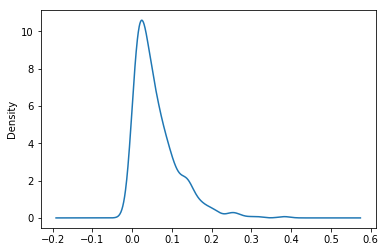

In [7]:
dfEdgesSJB.grade_abs.plot(kind='kde')

In [16]:
dfEdgesSJB['edgeGradeAbsDecile']=pd.qcut(dfEdgesSJB.grade_abs, 10)
dfEdgesSJB['edgeBearingDecile']=pd.qcut(dfEdgesSJB.bearing, 10)

In [17]:
dfEdgesSJB.head()

startNode           startNeigh     endNode             endNeigh  \
0  1832232979  Saint-Jean-Baptiste  1832232985  Saint-Jean-Baptiste   
1   177475608  Saint-Jean-Baptiste   177476195  Saint-Jean-Baptiste   
2   177475608  Saint-Jean-Baptiste   165217796  Saint-Jean-Baptiste   
3   177475608  Saint-Jean-Baptiste   304830503  Saint-Jean-Baptiste   
4  1832232985  Saint-Jean-Baptiste  2477818971  Saint-Jean-Baptiste   

   grade_abs  bearing  startIdx  endIdx pairIdxDirected pairIdxUndirected  \
0     0.1264  350.087         0       0          (0, 0)            (0, 0)   
1     0.0324  328.701         0       0          (0, 0)            (0, 0)   
2     0.0303   58.025         0       0          (0, 0)            (0, 0)   
3     0.0296  238.391         0       0          (0, 0)            (0, 0)   
4     0.2838   15.665         0       0          (0, 0)            (0, 0)   

    edgeBearingDecile edgeGradeAbsDecile  
0  (330.548, 357.544]    (0.0961, 0.137]  
1  (297.895, 330.548]    (0.0245, 0.033]  
2    (52.663, 59.681]    (0.0245, 0.033]  
3  (230.722, 238.521]    (0.0245, 0.033]  
4     (3.991, 52.663]     (0.137, 0.383]